In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\yashg\Downloads\housing-prices-dataset\train.csv',index_col=0)

In [5]:
data=pd.concat([df['SalePrice'],df['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,8000000));

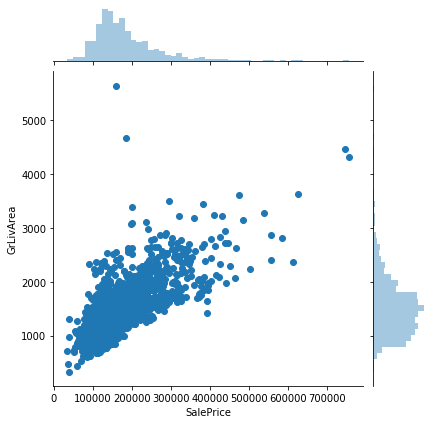

In [10]:
sns.jointplot('SalePrice','GrLivArea',data=df)

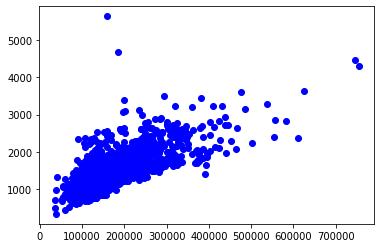

In [15]:
x1,y1=df['SalePrice'],df['GrLivArea']
plot.scatter(x1,y1,c='b')
plot.show()

In [17]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
dfc=pd.get_dummies(df['OverallCond'])

In [24]:
dfc.head()

,1,2,3,4,5,6,7,8,9
Id,,,,,,,,,
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0


In [28]:
pd.get_dummies(data=df,columns=['OverallCond'],drop_first=True).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,208500,0,0,0,1,0,0,0,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,Normal,181500,0,0,0,0,0,0,1,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Normal,223500,0,0,0,1,0,0,0,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Abnorml,140000,0,0,0,1,0,0,0,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,Normal,250000,0,0,0,1,0,0,0,0


In [39]:
data=pd.concat([df['SalePrice'],df['LotArea'],df['YearBuilt']],axis=1)

In [40]:
data.head()

,SalePrice,LotArea,YearBuilt
Id,,,
1,208500,8450,2003
2,181500,9600,1976
3,223500,11250,2001
4,140000,9550,1915
5,250000,14260,2000


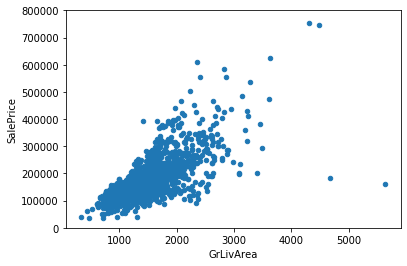

In [53]:
data=pd.concat([df['SalePrice'],df['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000));

In [61]:
data1=df[(df['GrLivArea']<4000)]

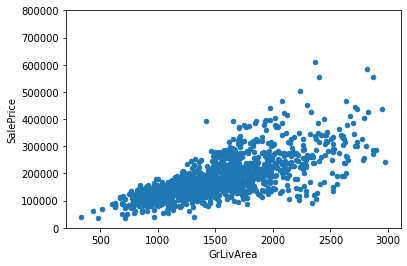

In [72]:
data=pd.concat([df1['SalePrice'],df1['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000));

In [69]:
df1=df.drop(df[(df['GrLivArea']>3000) & (df['GrLivArea']<6000)].index)

In [71]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
totalnull=df.isnull().sum(axis=0).sort_values(ascending=False)

In [95]:
percentage=((df.isnull().sum(axis=0))/len(df)*100).sort_values(ascending=False)

In [100]:
missing_data_columns=pd.concat([totalnull,percentage],axis=1,keys=['Total','Percentage']).head()

In [102]:
missing_data_columns

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


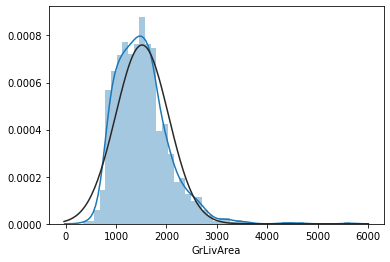

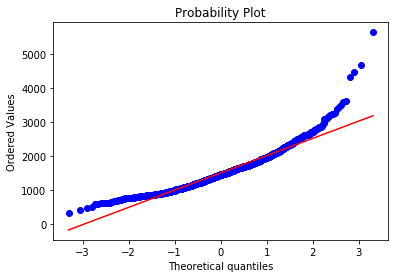

In [115]:
sns.distplot(df['GrLivArea'],fit=norm);
fig=plot.figure()
res=stats.probplot(df['GrLivArea'],plot=plot)

In [116]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [117]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
columns = df.select_dtypes(include=['int64','float64']).columns

In [143]:
x=df[columns]

In [144]:
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [145]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

for i in x.columns:
    print(pearsonr(x[i],y))

(-0.08428413512659517, 0.0012664716847495552)
(nan, 1.0)
(0.2638433538714056, 1.1231391549187896e-24)
(0.7909816005838051, 2.185675268e-313)
(-0.077855894048678, 0.0029123512679157704)
(0.5228973328794969, 2.9902290990135257e-103)
(0.5071009671113862, 3.1649482419182807e-96)
(nan, 1.0)
(0.3864198062421533, 3.3941098292886874e-53)
(-0.01137812145021514, 0.6639986508340475)
(0.2144791055469689, 1.1829757963594766e-16)
(0.6135805515591953, 9.484229391503079e-152)
(0.6058521846919146, 5.394710618968227e-147)
(0.3193338028320678, 5.7643351191794677e-36)
(-0.025606130000679534, 0.3282073098405023)
(0.708624477612652, 4.518033646778926e-223)
(0.22712223313149424, 1.550344137213525e-18)
(-0.016844154297359016, 0.5201536357277137)
(0.560663762748446, 1.236470066760021e-121)
(0.2841076755947825, 1.6504733955718557e-28)
(0.16821315430073996, 9.927497326179764e-11)
(-0.13590737084214122, 1.8604260320752816e-07)
(0.5337231555820281, 2.7722809329570187e-108)
(0.4669288367515278, 6.141487461115226e-8

In [159]:
df.fillna(0).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [148]:
columns = df.select_dtypes(include=['int64','float64']).columns

In [152]:
x=df[columns]

In [157]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [158]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

for i in x.columns:
    print(pearsonr(x[i],y))

(-0.08428413512659517, 0.0012664716847495552)
(nan, 1.0)
(0.2638433538714056, 1.1231391549187896e-24)
(0.7909816005838051, 2.185675268e-313)
(-0.077855894048678, 0.0029123512679157704)
(0.5228973328794969, 2.9902290990135257e-103)
(0.5071009671113862, 3.1649482419182807e-96)
(nan, 1.0)
(0.3864198062421533, 3.3941098292886874e-53)
(-0.01137812145021514, 0.6639986508340475)
(0.2144791055469689, 1.1829757963594766e-16)
(0.6135805515591953, 9.484229391503079e-152)
(0.6058521846919146, 5.394710618968227e-147)
(0.3193338028320678, 5.7643351191794677e-36)
(-0.025606130000679534, 0.3282073098405023)
(0.708624477612652, 4.518033646778926e-223)
(0.22712223313149424, 1.550344137213525e-18)
(-0.016844154297359016, 0.5201536357277137)
(0.560663762748446, 1.236470066760021e-121)
(0.2841076755947825, 1.6504733955718557e-28)
(0.16821315430073996, 9.927497326179764e-11)
(-0.13590737084214122, 1.8604260320752816e-07)
(0.5337231555820281, 2.7722809329570187e-108)
(0.4669288367515278, 6.141487461115226e-8

In [161]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [175]:
data=x

In [176]:
data=data.fillna(value=0)

In [177]:
model = LinearRegression()

In [178]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]

rfe = RFE(model, 10)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
 False  True False False False False False False False False False False]
[ 5 12 26  1  2  4  7 10 20 27 24 21 14 15 18  8  1  1  1  1  1  1  1  1
 17  1 23 11 22 19 16  9 13 25  6  3]


In [179]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [180]:
from sklearn.feature_selection import SelectFromModel

In [182]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]

In [183]:
print('Before');
print(X.shape)

clf = DecisionTreeClassifier()
clf.fit(X, y)

print('\nFeature Importance');
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

print('\nAfter'); 
print(X_new.shape)

Before
(1460, 36)

Feature Importance
[0.01795678 0.05654537 0.05135843 0.02640592 0.02172972 0.03918883
 0.0376971  0.02564161 0.04186745 0.00984987 0.04738158 0.04981047
 0.04444163 0.02523284 0.00206276 0.05721803 0.01620924 0.00297231
 0.00301906 0.01100138 0.02392117 0.00378172 0.03791933 0.01739822
 0.0356653  0.01385715 0.05844797 0.05666517 0.0445682  0.00813644
 0.00412717 0.00771079 0.00068759 0.00137517 0.0464026  0.05174563]

After
(1460, 16)


In [185]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [186]:
importances = forest.feature_importances_
importances

array([0.02537407, 0.04450229, 0.04737957, 0.03288486, 0.02734426,
       0.04426132, 0.04392476, 0.03075917, 0.04126751, 0.01225841,
       0.04648536, 0.04508261, 0.04676878, 0.02659315, 0.00226174,
       0.04713048, 0.01894625, 0.00624125, 0.01298566, 0.01443789,
       0.02566084, 0.00364756, 0.0351366 , 0.02101559, 0.04158936,
       0.01770333, 0.04536317, 0.03496102, 0.03671552, 0.0143493 ,
       0.00305755, 0.00990352, 0.00056199, 0.00516358, 0.04644547,
       0.04183621])

In [187]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.00423432, 0.00544256, 0.00559614, 0.0050508 , 0.00437714,
       0.00519885, 0.00552356, 0.00462905, 0.00526848, 0.00292106,
       0.00542686, 0.00549059, 0.00595518, 0.00430838, 0.00106775,
       0.00515805, 0.00452616, 0.00232288, 0.00429177, 0.00515025,
       0.00392393, 0.00131014, 0.00474513, 0.0059302 , 0.00504903,
       0.00432577, 0.00567036, 0.0048612 , 0.00519003, 0.00310536,
       0.00134655, 0.00254662, 0.00058524, 0.00161807, 0.00518475,
       0.00548736])

In [188]:
indices = np.argsort(importances)[::-1]
indices

array([ 2, 15, 12, 10, 34, 26, 11,  1,  5,  6, 35, 24,  8, 28, 22, 27,  3,
        7,  4, 13, 20,  0, 23, 16, 25, 19, 29, 18,  9, 31, 17, 33, 21, 30,
       14, 32], dtype=int64)

In [189]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.047380)
2. feature 15 (0.047130)
3. feature 12 (0.046769)
4. feature 10 (0.046485)
5. feature 34 (0.046445)
6. feature 26 (0.045363)
7. feature 11 (0.045083)
8. feature 1 (0.044502)
9. feature 5 (0.044261)
10. feature 6 (0.043925)
11. feature 35 (0.041836)
12. feature 24 (0.041589)
13. feature 8 (0.041268)
14. feature 28 (0.036716)
15. feature 22 (0.035137)
16. feature 27 (0.034961)
17. feature 3 (0.032885)
18. feature 7 (0.030759)
19. feature 4 (0.027344)
20. feature 13 (0.026593)
21. feature 20 (0.025661)
22. feature 0 (0.025374)
23. feature 23 (0.021016)
24. feature 16 (0.018946)
25. feature 25 (0.017703)
26. feature 19 (0.014438)
27. feature 29 (0.014349)
28. feature 18 (0.012986)
29. feature 9 (0.012258)
30. feature 31 (0.009904)
31. feature 17 (0.006241)
32. feature 33 (0.005164)
33. feature 21 (0.003648)
34. feature 30 (0.003058)
35. feature 14 (0.002262)
36. feature 32 (0.000562)


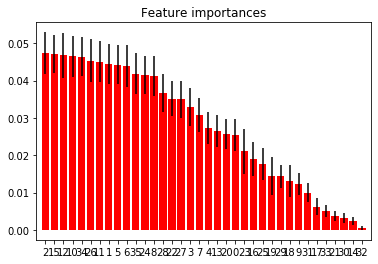

In [194]:
plot.figure()
plot.title("Feature importances")
plot.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",width=0.8)
plot.xticks(range(X.shape[1]), indices)
plot.xlim([-1, X.shape[1]])
plot.show()